In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import time
from tqdm import tqdm
import os, sys
import json
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
import matplotlib.image as mpimg
from adjustText import adjust_text


In [7]:
path = "C:/Users/derwi/OneDrive/Documentos/japon/"

In [8]:
with open(path +'sb_matches.json', 'r', encoding="utf8") as file:
    matches = json.load(file)

In [9]:
matches

[{'match_id': 3925596,
  'match_date': '2024-12-08',
  'kick_off': '07:00:00.000',
  'home_score': 1,
  'away_score': 0,
  'behind_closed_doors': False,
  'neutral_ground': False,
  'collection_status': 'Complete',
  'play_status': 'Normal',
  'match_status': 'available',
  'match_status_360': 'available',
  'last_updated': '2024-12-09T18:59:04.147550',
  'last_updated_360': '2024-12-10T15:00:19.895188',
  'match_week': 38,
  'competition.competition_id': 108,
  'competition.country_name': 'Japan',
  'competition.competition_name': 'J1 League',
  'season.season_id': 282,
  'season.season_name': '2024',
  'home_team.home_team_id': 1897,
  'home_team.home_team_name': 'Consadole Sapporo',
  'home_team.home_team_gender': 'male',
  'home_team.home_team_youth': False,
  'home_team.managers': [{'id': 4419,
    'name': 'Michael Petrović',
    'dob': '1957-10-18',
    'country.id': 203,
    'country.name': 'Serbia'}],
  'home_team.country.id': 114,
  'home_team.country.name': 'Japan',
  'away_t

In [10]:
# Usando la función "json_normalize()" de la librería pandas podemos transformar este archivo json en un dataframe:

In [11]:
table_matches = pd.json_normalize(matches)
table_matches.head(10)

,match_id,match_date,kick_off,home_score,away_score,behind_closed_doors,neutral_ground,collection_status,play_status,match_status,...,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name
0,3925596,2024-12-08,07:00:00.000,1,0,False,False,Complete,Normal,available,...,1,Regular Season,83704,Sapporo Dome,114,Japan,1543,Yudai Yamamoto,114,Japan
1,3925601,2024-12-08,07:00:00.000,3,1,False,False,Complete,Normal,available,...,1,Regular Season,83705,Kashima Soccer Stadium,114,Japan,1855,Hiroyuki Kimura,114,Japan
2,3925597,2024-12-08,07:00:00.000,0,0,False,False,Complete,Normal,available,...,1,Regular Season,5615,Saitama Stadium 2002,114,Japan,1859,Yuichi Nishimura,114,Japan
3,3925599,2024-12-08,07:00:00.000,3,1,False,False,Complete,Normal,available,...,1,Regular Season,83712,Uvance Todoroki Stadium by Fujitsu,114,Japan,2507,Keigo Sendachi,114,Japan
4,3925604,2024-12-08,07:00:00.000,3,0,False,False,Complete,Normal,available,...,1,Regular Season,5515,NOEVIR Stadium Kobe,114,Japan,1856,Yusuke Araki,114,Japan
5,3925603,2024-12-08,07:00:00.000,3,1,False,False,Complete,Normal,available,...,1,Regular Season,117760,Panasonic Stadium Suita,114,Japan,1858,Hiroki Kasahara,114,Japan
6,3925598,2024-12-08,07:00:00.000,3,0,False,False,Complete,Normal,available,...,1,Regular Season,83706,Ajinomoto Stadium,114,Japan,2546,Yoshimi Yamashita,114,Japan
7,3925600,2024-12-08,07:00:00.000,0,2,False,False,Complete,Normal,available,...,1,Regular Season,4935,Nissan Stadium,114,Japan,2354,Ryo Tanimoto,114,Japan
8,3925588,2024-11-30,07:00:00.000,1,0,False,False,Complete,Normal,available,...,1,Regular Season,117768,Machida Gion Stadium,114,Japan,1986,Futoshi Nakamura,114,Japan
9,3925587,2024-11-30,07:00:00.000,1,1,False,False,Complete,Normal,available,...,1,Regular Season,83713,Sankyo Frontier Kashiwa Stadium,114,Japan,2877,Takafumi Mikuriya,114,Japan


In [12]:
# Exploremos que columnas y tipo de información contiene la tabla:

In [13]:
table_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   match_id                        380 non-null    int64 
 1   match_date                      380 non-null    object
 2   kick_off                        380 non-null    object
 3   home_score                      380 non-null    int64 
 4   away_score                      380 non-null    int64 
 5   behind_closed_doors             380 non-null    bool  
 6   neutral_ground                  380 non-null    bool  
 7   collection_status               380 non-null    object
 8   play_status                     380 non-null    object
 9   match_status                    380 non-null    object
 10  match_status_360                380 non-null    object
 11  last_updated                    380 non-null    object
 12  last_updated_360                380 non-null    ob

In [14]:
table_matches['fixture_name'] = 'Week' +' '+table_matches['match_week'].astype(str) +' - ' + table_matches['home_team.home_team_name'] + ' vs ' + table_matches['away_team.away_team_name']
table_matches = table_matches[['match_id','match_week', 'fixture_name','match_date', 'kick_off',
                   'competition.competition_id', 'competition.competition_name','competition.country_name',
                   'season.season_id','season.season_name',
                   'stadium.id','stadium.name','referee.id', 'referee.name','home_team.managers','away_team.managers',
                   'home_team.home_team_id','home_team.home_team_name','home_score', 
                   'away_team.away_team_id', 'away_team.away_team_name','away_score']]

table_matches

,match_id,match_week,fixture_name,match_date,kick_off,competition.competition_id,competition.competition_name,competition.country_name,season.season_id,season.season_name,...,referee.id,referee.name,home_team.managers,away_team.managers,home_team.home_team_id,home_team.home_team_name,home_score,away_team.away_team_id,away_team.away_team_name,away_score
0,3925596,38,Week 38 - Consadole Sapporo vs Kashiwa Reysol,2024-12-08,07:00:00.000,108,J1 League,Japan,282,2024,...,1543,Yudai Yamamoto,"[{'id': 4419, 'name': 'Michael Petrović', 'dob...","[{'id': 1003185, 'name': 'Masami Ihara', 'dob'...",1897,Consadole Sapporo,1,1890,Kashiwa Reysol,0
1,3925601,38,Week 38 - Kashima Antlers vs FC Machida Zelvia,2024-12-08,07:00:00.000,108,J1 League,Japan,282,2024,...,1855,Hiroyuki Kimura,"[{'id': 1005547, 'name': 'Masaki Chugo', 'dob'...","[{'id': 1002779, 'name': 'Go Kuroda', 'dob': '...",1881,Kashima Antlers,3,4609,FC Machida Zelvia,1
2,3925597,38,Week 38 - Urawa Reds vs Albirex Niigata,2024-12-08,07:00:00.000,108,J1 League,Japan,282,2024,...,1859,Yuichi Nishimura,"[{'id': 5968, 'name': 'Maciej Skorża', 'dob': ...","[{'id': 1001119, 'name': 'Rikizo Matsuhashi', ...",1882,Urawa Reds,0,4629,Albirex Niigata,0
3,3925599,38,Week 38 - Kawasaki Frontale vs Avispa Fukuoka,2024-12-08,07:00:00.000,108,J1 League,Japan,282,2024,...,2507,Keigo Sendachi,"[{'id': 4417, 'name': 'Toru Oniki', 'dob': '19...","[{'id': 5865, 'name': 'Shigetoshi Hasebe', 'do...",1892,Kawasaki Frontale,3,4260,Avispa Fukuoka,1
4,3925604,38,Week 38 - Vissel Kobe vs Shonan Bellmare,2024-12-08,07:00:00.000,108,J1 League,Japan,282,2024,...,1856,Yusuke Araki,"[{'id': 5748, 'name': 'Takayuki Yoshida', 'dob...","[{'id': 1000497, 'name': 'Satoshi Yamaguchi', ...",1886,Vissel Kobe,3,1895,Shonan Bellmare,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3925235,1,Week 1 - Kashiwa Reysol vs Kyoto Sanga FC,2024-02-25,07:00:00.000,108,J1 League,Japan,282,2024,...,1983,Jumpei Iida,"[{'id': 1003185, 'name': 'Masami Ihara', 'dob'...","[{'id': 5861, 'name': 'Kwi-Jae Cho', 'nickname...",1890,Kashiwa Reysol,1,4631,Kyoto Sanga FC,1
376,3925231,1,Week 1 - Shonan Bellmare vs Kawasaki Frontale,2024-02-24,08:00:00.000,108,J1 League,Japan,282,2024,...,2000,Koei Koya,"[{'id': 1000497, 'name': 'Satoshi Yamaguchi', ...","[{'id': 4417, 'name': 'Toru Oniki', 'dob': '19...",1895,Shonan Bellmare,1,1892,Kawasaki Frontale,2
377,3925229,1,Week 1 - Cerezo Osaka vs Tokyo,2024-02-24,08:00:00.000,108,J1 League,Japan,282,2024,...,1543,Yudai Yamamoto,"[{'id': 1000396, 'name': 'Akio Kogiku', 'dob':...","[{'id': 4701, 'name': 'Peter Cklamovski', 'dob...",1891,Cerezo Osaka,2,1888,Tokyo,2
378,3925227,1,Week 1 - Nagoya Grampus vs Kashima Antlers,2024-02-23,11:00:00.000,108,J1 League,Japan,282,2024,...,1856,Yusuke Araki,"[{'id': 4700, 'name': 'Kenta Hasegawa', 'dob':...","[{'id': 490, 'name': 'Ranko Popović', 'dob': '...",1884,Nagoya Grampus,0,1881,Kashima Antlers,3


In [15]:
table_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   match_id                      380 non-null    int64 
 1   match_week                    380 non-null    int64 
 2   fixture_name                  380 non-null    object
 3   match_date                    380 non-null    object
 4   kick_off                      380 non-null    object
 5   competition.competition_id    380 non-null    int64 
 6   competition.competition_name  380 non-null    object
 7   competition.country_name      380 non-null    object
 8   season.season_id              380 non-null    int64 
 9   season.season_name            380 non-null    object
 10  stadium.id                    380 non-null    int64 
 11  stadium.name                  380 non-null    object
 12  referee.id                    380 non-null    int64 
 13  referee.name        

In [ ]:
#Task1: Obtener la tabla de posiciones final.

In [44]:
# Copia del df para trabajar
df = table_matches.copy()

# Creamos dos dataframes: uno con stats de local y otro con stats de visitante
home = df[['match_id','home_team.home_team_id','home_team.home_team_name','home_score','away_score']].copy()

home = home.rename(columns={
    'home_team.home_team_id':'team_id',
    'home_team.home_team_name':'team_name',
    'home_score':'gf',
    'away_score':'ga'
})
home['venue'] = 'home'

away = df[['match_id','away_team.away_team_id','away_team.away_team_name','home_score','away_score']].copy()

away = away.rename(columns={
    'away_team.away_team_id':'team_id',
    'away_team.away_team_name':'team_name',
    'away_score':'gf',
    'home_score':'ga'
})
away['venue'] = 'away'

# Unimos ambos
matches_long = pd.concat([home, away])

# Calculamos puntos
def puntos(row):
    if row['gf'] > row['ga']:
        return 3
    elif row['gf'] == row['ga']:
        return 1
    else:
        return 0

matches_long['points'] = matches_long.apply(puntos, axis=1)

# Agregamos por equipo
standings = matches_long.groupby(['team_id','team_name']).agg(
    PJ = ('match_id','count'),
    GF = ('gf','sum'),
    GC = ('ga','sum'),
    PTS = ('points','sum')
).reset_index()

# Diferencia de goles
standings['DG'] = standings['GF'] - standings['GC']

# Ordenamos tabla
standings = standings.sort_values(by=['PTS','DG','GF'], ascending=[False,False,False]).reset_index(drop=True)

print(standings)


    team_id            team_name  PJ  GF  GC  PTS  DG
0      1886          Vissel Kobe  38  61  36   72  25
1      1889  Sanfrecce Hiroshima  38  72  43   68  29
2      4609    FC Machida Zelvia  38  54  34   66  20
3      1885          Gamba Osaka  38  49  35   66  14
4      1881      Kashima Antlers  38  60  41   65  19
5      4654          Tokyo Verdy  38  51  51   56   0
6      1888                Tokyo  38  53  51   54   2
7      1892    Kawasaki Frontale  38  66  57   52   9
8      1880  Yokohama F. Marinos  38  61  62   52  -1
9      1891         Cerezo Osaka  38  43  48   52  -5
10     1884       Nagoya Grampus  38  44  47   50  -3
11     4260       Avispa Fukuoka  38  33  38   50  -5
12     1882           Urawa Reds  38  49  45   48   4
13     4631       Kyoto Sanga FC  38  43  55   47 -12
14     1895      Shonan Bellmare  38  53  58   45  -5
15     4629      Albirex Niigata  38  44  59   42 -15
16     1890       Kashiwa Reysol  38  39  51   41 -12
17     4652         Júbilo I

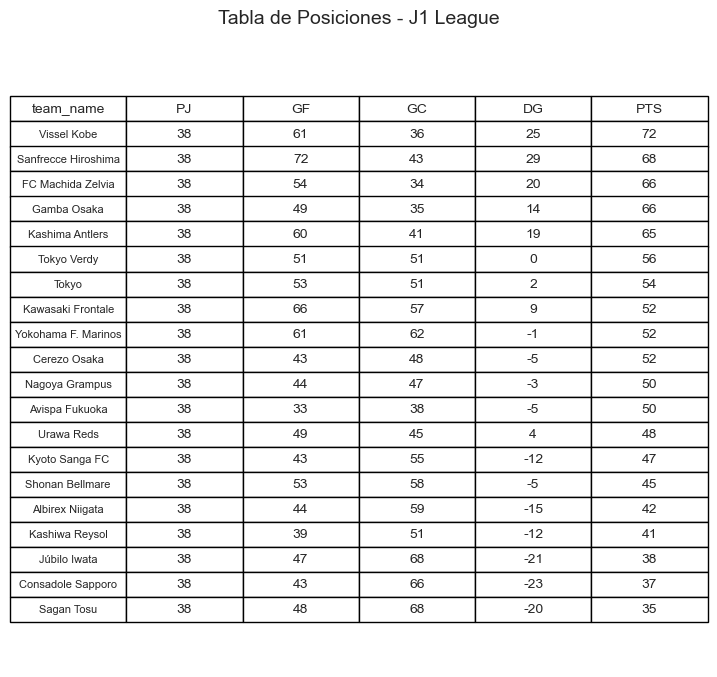

In [53]:
# Creamos figura
fig, ax = plt.subplots(figsize=(9, len(standings)*0.4))
ax.axis('off')
ax.axis('tight')

# Mostrar solo columnas clave
cols = ['team_name', 'PJ', 'GF', 'GC', 'DG', 'PTS']
tabla = standings[cols].copy()


# Crear tabla visual
tabla_plot = ax.table(cellText=tabla.values, colLabels=tabla.columns, loc='center', cellLoc='center')

# Ajustes generales
tabla_plot.auto_set_font_size(False)
tabla_plot.set_fontsize(10)
tabla_plot.scale(1, 1.5)

# --- Reducir solo el tamaño de la columna team_name ---
for (row, col), cell in tabla_plot.get_celld().items():
    if col == 0 and row > 0:  # primera columna (team_name), ignorar encabezado
        cell.get_text().set_fontsize(8)  # tamaño reducido solo para nombres

plt.title("Tabla de Posiciones - J1 League", fontsize=14, pad=20)
plt.show()

In [ ]:
#Task #2: ¿Qué equipo logró una mejor consistencia de local y visitante? 

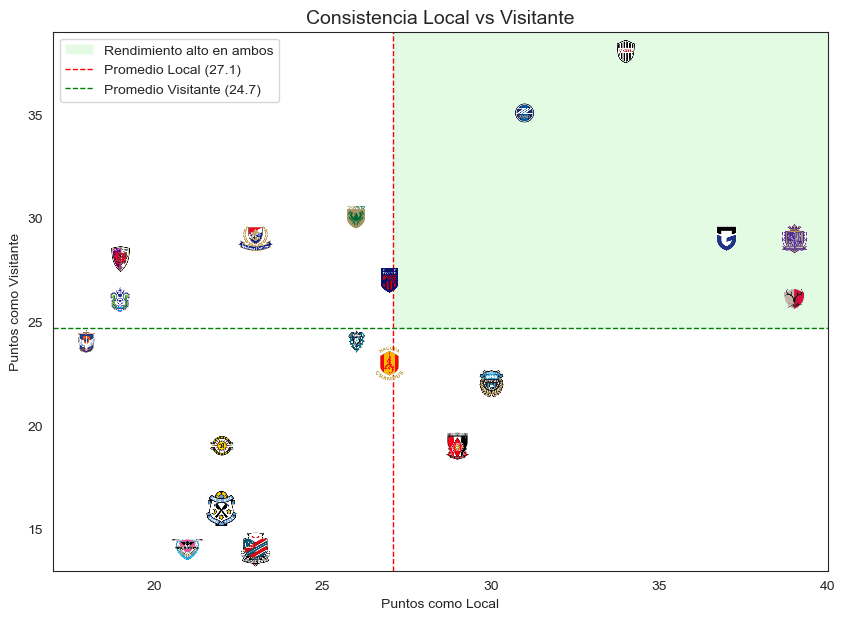

In [42]:
# Copia para trabajar
df = table_matches.copy()

# Limpiar nombres de columnas (opcional si aún tienen ".")
df.columns = df.columns.str.replace(r'\.', '_', regex=True)

# Puntos como local
home = df[['match_id','home_team_home_team_id','home_team_home_team_name','home_score','away_score']].copy()
home['points'] = home.apply(lambda row: 3 if row['home_score'] > row['away_score'] 
                            else (1 if row['home_score'] == row['away_score'] else 0), axis=1)
home = home.groupby(['home_team_home_team_id','home_team_home_team_name'])['points'].sum().reset_index()
home = home.rename(columns={'points':'home_points', 'home_team_home_team_name':'team_name'})

# Puntos como visitante
away = df[['match_id','away_team_away_team_id','away_team_away_team_name','home_score','away_score']].copy()
away['points'] = away.apply(lambda row: 3 if row['away_score'] > row['home_score'] 
                            else (1 if row['away_score'] == row['home_score'] else 0), axis=1)
away = away.groupby(['away_team_away_team_id','away_team_away_team_name'])['points'].sum().reset_index()
away = away.rename(columns={'points':'away_points', 'away_team_away_team_name':'team_name'})

# Unir local y visitante
standings = pd.merge(home[['team_name','home_points']],
                     away[['team_name','away_points']],
                     on='team_name')

# Calcular promedios
avg_home = standings["home_points"].mean()
avg_away = standings["away_points"].mean()

# --- 📊 Scatterplot base ---
plt.figure(figsize=(10,7))
sns.set_style("white")
sns.scatterplot(data=standings, x="home_points", y="away_points", s=0)  # puntos invisibles

ax = plt.gca()

# --- 💡 Rellenar cuadrante superior derecho ---
x_min, x_max = standings["home_points"].min()-1, standings["home_points"].max()+1
y_min, y_max = standings["away_points"].min()-1, standings["away_points"].max()+1

# agregar un rectángulo desde los promedios hacia el máximo
ax.axvspan(avg_home, x_max, ymin=(avg_away - y_min)/(y_max - y_min), ymax=1,
           facecolor="lightgreen", alpha=0.25, zorder=0, label="Rendimiento alto en ambos")


# --- Agregar escudos ---
for i, row in standings.iterrows():
    # ruta completa al escudo del equipo
    logo_path = f"C:/Users/derwi/OneDrive/Documentos/japon/j1league/{row.team_name}.png"

    if os.path.exists(logo_path):
        img = mpimg.imread(logo_path)
        imagebox = OffsetImage(img, zoom=0.199)  # ajustar tamaño del escudo
        ab = AnnotationBbox(imagebox, (row.home_points, row.away_points),
                            frameon=False)
        plt.gca().add_artist(ab)
    else:
        # Si no hay escudo, usar el nombre del equipo como texto
        plt.text(row.home_points, row.away_points, row.team_name,
                 fontsize=9, ha="center", va="center")

# --- Líneas promedio ---
plt.axvline(x=avg_home, color="red", linestyle="--", linewidth=1, label=f"Promedio Local ({avg_home:.1f})")
plt.axhline(y=avg_away, color="green", linestyle="--", linewidth=1, label=f"Promedio Visitante ({avg_away:.1f})")

# --- Límites y estilo ---
plt.xlim(standings.home_points.min()-1, standings.home_points.max()+1)
plt.ylim(standings.away_points.min()-1, standings.away_points.max()+1)

plt.title("Consistencia Local vs Visitante", fontsize=14)
plt.xlabel("Puntos como Local")
plt.ylabel("Puntos como Visitante")
plt.legend()
plt.show()



In [62]:
#Task3: ¿Qué equipo logró terminar en una mejor forma? Pista: puedes realizar un gráfico de barras mostrando 
#el ranking de rendimiento en puntos, goles o diferencia de gol, solo tomando las últimas 10 o 5 rondas


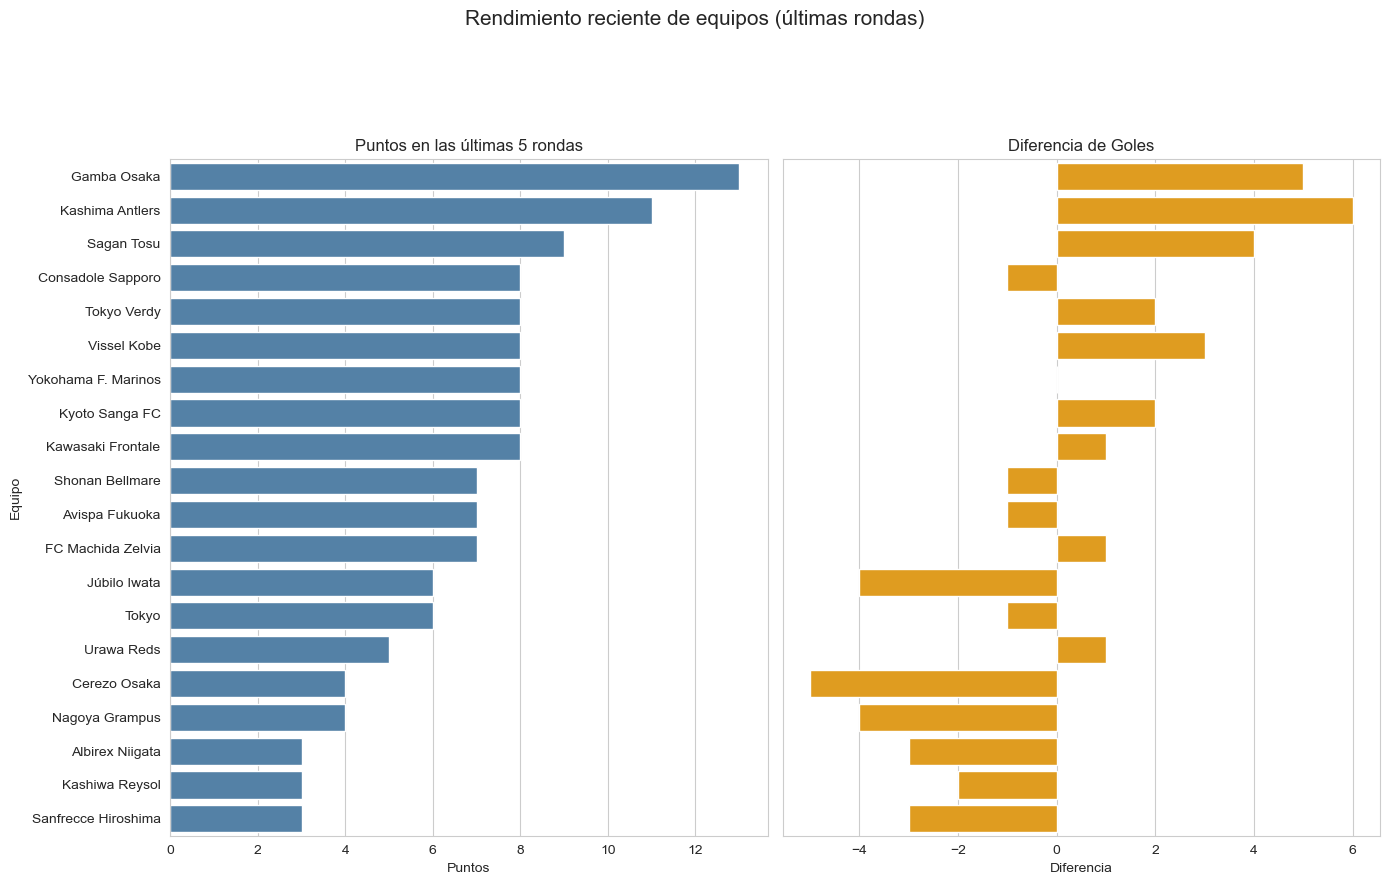

In [60]:
# --- Parámetros ---
ULTIMAS = 5
df = table_matches.copy()

# --- Filtrar últimas N rondas ---
max_week = df['match_week'].max()
ultimas_rondas = df[df['match_week'] > max_week - ULTIMAS].copy()

# --- Calcular puntos ---
def calc_points(home_score, away_score):
    if home_score > away_score:
        return 3
    elif home_score == away_score:
        return 1
    else:
        return 0

ultimas_rondas['home_points'] = ultimas_rondas.apply(lambda row: calc_points(row['home_score'], row['away_score']), axis=1)
ultimas_rondas['away_points'] = ultimas_rondas.apply(lambda row: calc_points(row['away_score'], row['home_score']), axis=1)

# --- Puntos totales ---
home_pts = ultimas_rondas.groupby('home_team.home_team_name').agg(home_points=('home_points','sum')).reset_index().rename(columns={'home_team.home_team_name':'team'})
away_pts = ultimas_rondas.groupby('away_team.away_team_name').agg(away_points=('away_points','sum')).reset_index().rename(columns={'away_team.away_team_name':'team'})
pts_totales = pd.merge(home_pts, away_pts, on='team', how='outer').fillna(0)
pts_totales['points_total'] = pts_totales['home_points'] + pts_totales['away_points']

# --- Diferencia de goles ---
home_goals = ultimas_rondas.groupby('home_team.home_team_name').agg(
    goals_for=('home_score','sum'),
    goals_against=('away_score','sum')
).reset_index().rename(columns={'home_team.home_team_name':'team'})

away_goals = ultimas_rondas.groupby('away_team.away_team_name').agg(
    goals_for=('away_score','sum'),
    goals_against=('home_score','sum')
).reset_index().rename(columns={'away_team.away_team_name':'team'})

goles_totales = pd.merge(home_goals, away_goals, on='team', how='outer').fillna(0)
goles_totales['goal_diff_total'] = (goles_totales['goals_for_x'] + goles_totales['goals_for_y']) - (goles_totales['goals_against_x'] + goles_totales['goals_against_y'])

# --- Ranking final ---
ranking = pd.merge(pts_totales[['team','points_total']], goles_totales[['team','goal_diff_total']], on='team')
ranking = ranking.sort_values(by='points_total', ascending=False).reset_index(drop=True)

# --- 🎨 Subplots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
sns.set_style("whitegrid")

# --- Subplot 1: Puntos ---
sns.barplot(data=ranking, x='points_total', y='team', ax=axes[0], color='steelblue')
axes[0].set_title(f'Puntos en las últimas {ULTIMAS} rondas')
axes[0].set_xlabel('Puntos')
axes[0].set_ylabel('Equipo')

# --- Subplot 2: Diferencia de goles ---
sns.barplot(data=ranking, x='goal_diff_total', y='team', ax=axes[1], color='orange')
axes[1].set_title('Diferencia de Goles')
axes[1].set_xlabel('Diferencia')
axes[1].set_ylabel('')

# --- Ajustes finales ---
plt.suptitle("Rendimiento reciente de equipos (últimas rondas)", fontsize=15, y=1.1)
plt.tight_layout()
plt.show()